**Part III. Advanced Marketing Applications**

**8.Reducing Data Complexity**

**8.1 Consumer Brand Rating Data**

In [1]:
brand.ratings = read.csv("http://goo.gl/IQl8nc")
head(brand.ratings)

perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
2,4,8,8,2,9,7,4,6,a
1,1,4,7,1,1,1,2,2,a
2,3,5,9,2,9,5,1,6,a
1,6,10,8,3,4,5,2,1,a
1,1,5,8,1,9,9,1,1,a
2,8,9,5,3,8,7,1,2,a


In [2]:
tail(brand.ratings)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,4,2,8,7,1,3,3,5,2,j
996,2,2,3,6,4,8,5,1,2,j
997,3,2,6,7,1,3,3,2,1,j
998,1,1,10,10,1,6,5,5,2,j
999,1,1,7,5,1,1,2,5,1,j
1000,7,4,7,8,4,1,2,5,1,j


In [3]:
summary(brand.ratings)

    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max. 

In [4]:
str(brand.ratings)

'data.frame':	1000 obs. of  10 variables:
 $ perform: int  2 1 2 1 1 2 1 2 2 3 ...
 $ leader : int  4 1 3 6 1 8 1 1 1 1 ...
 $ latest : int  8 4 5 10 5 9 5 7 8 9 ...
 $ fun    : int  8 7 9 8 8 5 7 5 10 8 ...
 $ serious: int  2 1 2 3 1 3 1 2 1 1 ...
 $ bargain: int  9 1 9 4 9 8 5 8 7 3 ...
 $ value  : int  7 1 5 5 9 7 1 7 7 3 ...
 $ trendy : int  4 2 1 2 1 1 1 7 5 4 ...
 $ rebuy  : int  6 2 6 1 1 2 1 1 1 1 ...
 $ brand  : Factor w/ 10 levels "a","b","c","d",..: 1 1 1 1 1 1 1 1 1 1 ...


**8.1.1 Rescaling the Data**

A common procedure is to center each variable by subtracting its mean from every observation, and then rescale those centered values as units of standard deviation. This is commonly called ***standardizing, normalizing,or Z scoring*** the data

In [6]:
x = 1:1000
x.sc = (x-mean(x)) / sd(x)
summary(x.sc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7295 -0.8647  0.0000  0.0000  0.8647  1.7295 

In [7]:
brand.sc = brand.ratings
brand.sc[,1:9] = scale(brand.sc[,1:9])
summary(brand.sc)

    perform            leader            latest             fun          
 Min.   :-1.0888   Min.   :-1.3100   Min.   :-1.6878   Min.   :-1.84677  
 1st Qu.:-1.0888   1st Qu.:-0.9266   1st Qu.:-0.7131   1st Qu.:-0.75358  
 Median :-0.1523   Median :-0.1599   Median : 0.2615   Median :-0.02478  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7842   3rd Qu.: 0.6069   3rd Qu.: 0.9113   3rd Qu.: 0.70402  
 Max.   : 1.7206   Max.   : 2.1404   Max.   : 1.2362   Max.   : 1.43281  
                                                                         
    serious           bargain             value             trendy        
 Min.   :-1.1961   Min.   :-1.22196   Min.   :-1.3912   Min.   :-1.53897  
 1st Qu.:-0.8362   1st Qu.:-0.84701   1st Qu.:-0.9743   1st Qu.:-0.80960  
 Median :-0.1163   Median :-0.09711   Median :-0.1405   Median :-0.08023  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6036   3rd Qu.: 0.652

In corrplot(), the argument order="hclust" reorders the rows and columns according to variables’ similarity in a hierarchical cluster solution. The result is shown in Fig, where we see that the ratings seem to group into three clusters of similar variables, a hypothesis we examine in detail in this chapter.

In [9]:
install.packages('corrplot')
library(corrplot)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


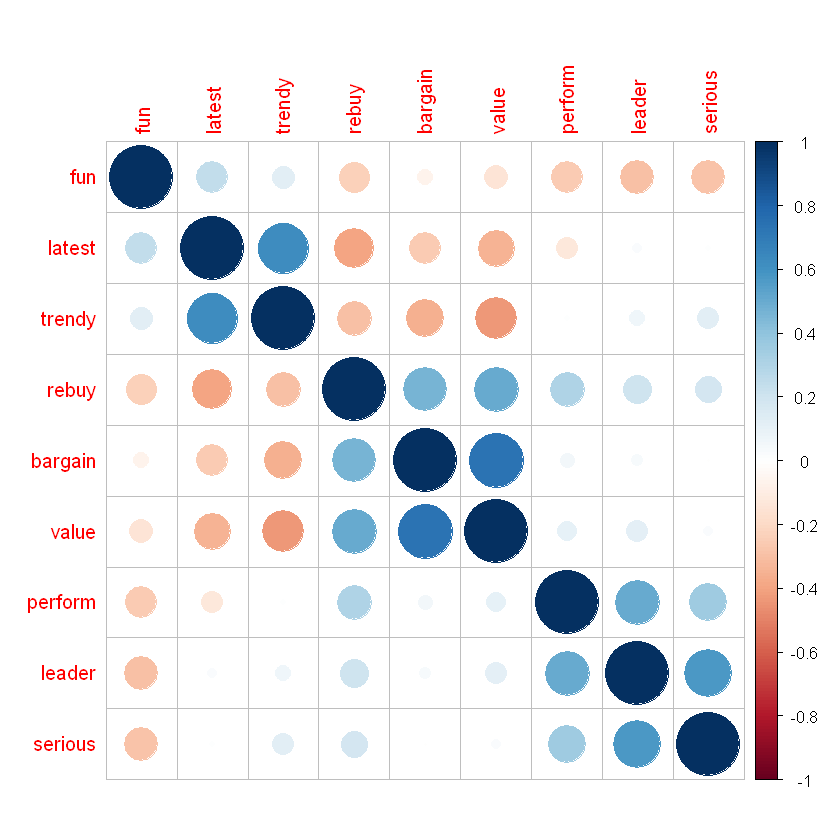

In [13]:
corrplot(cor(brand.sc[,1:9]), order='hclust')

Fig. 8.1. Correlation plot for the simulated consumer brand ratings.
This visualization of the basic data appears to show three general clusters
that comprise *fun/latest/trendy*, *rebuy/bargain/value*, and *perform/leader /serious*, respectively.

**8.1.2 Aggregate Mean Ratings by Brand**

In [21]:
(brand.mean = aggregate(. ~ brand, data=brand.sc, mean))

brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603
j,-0.62994504,-0.7885965,-0.1543180,0.2849595,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


In [22]:
rownames(brand.mean) = brand.mean[ ,1]
brand.mean = brand.mean[ ,-1]

In [23]:
brand.mean

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603
j,-0.62994504,-0.7885965,-0.1543180,0.2849595,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


A *heatmap* is a useful way to examine such results because it colors data points by the intensities of their values. We use *heatmap.2()* from the gplots  package with colors from the RColorBrewer package

In [24]:
install.packages('gplots')
library(gplots)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages



Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [25]:
install.packages('RColorBrewer')
library(RColorBrewer)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


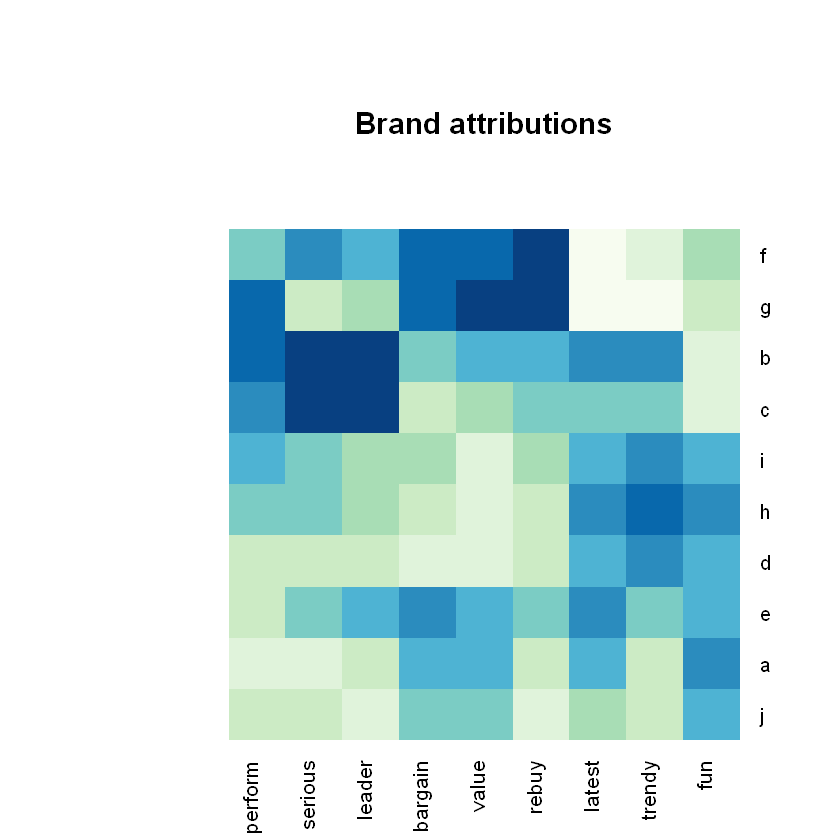

In [27]:
heatmap.2(as.matrix(brand.mean), col=brewer.pal(9, 'GnBu'), trace='none', key=F, dend='none', main='\n\n\n\nBrand attributions')

Fig. 8.2. A heatmap for the mean of each adjective by brand. Brands f and g are similar—with high ratings for rebuy and value but low ratings for latest and fun. Other groups of similar brands are b/c, i/h/d, and a/j.

**8.2 Principal Component Analysis and Perceptual Maps**

**8.2.1 PCA Example**

We explore PCA first with a simple data set to see and develop intuition about what is happening. We create highly correlated data by copying a random vector xvar to a new vector yvar while replacing half of the data points. Then we repeat that procedure to create zvar from yvar

In [30]:
set.seed(98286)
xvar = sample(1:10, 100, replace=T)
yvar = xvar
yvar[sample(1:length(yvar), 50)] = sample(1:10, 50, replace=T)
zvar=yvar
zvar[sample(1:length(zvar),50)]  = sample(1:10, 50, replace=T)
my.vars = cbind(xvar, yvar, zvar)

,xvar,yvar,zvar
xvar,1.0000000,0.5969717,0.2496469
yvar,0.5969717,1.0000000,0.5231468
zvar,0.2496469,0.5231468,1.0000000


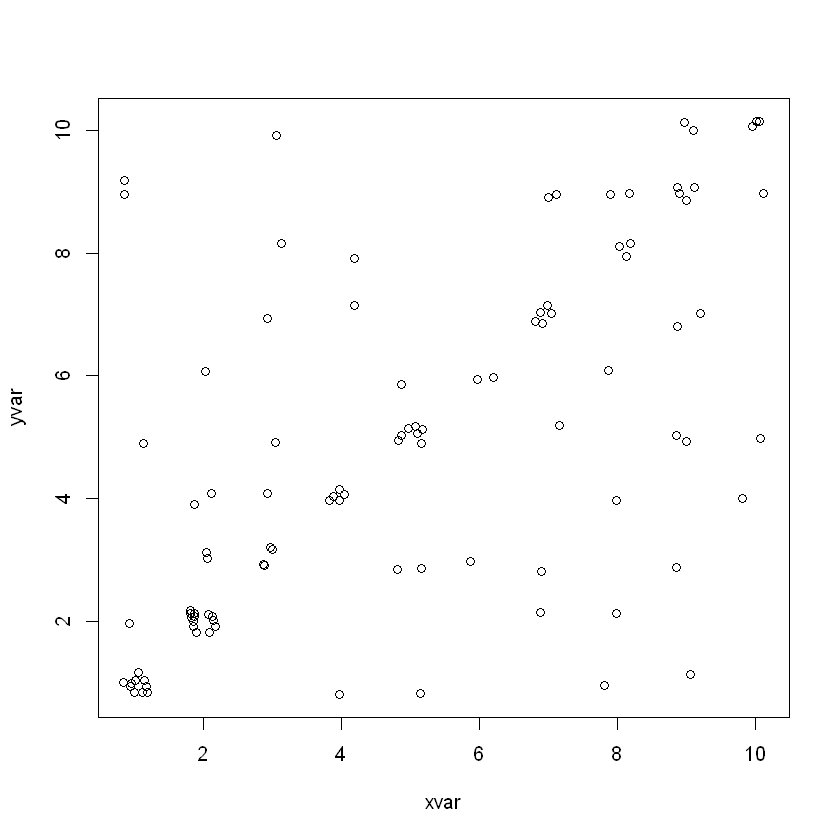

In [33]:
plot(yvar ~ xvar, data=jitter(my.vars))
cor(my.vars)

In [35]:
my.pca = prcomp(my.vars)
summary(my.pca)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     3.9992 2.4381 1.6269
Proportion of Variance 0.6505 0.2418 0.1077
Cumulative Proportion  0.6505 0.8923 1.0000

In [36]:
my.pca

Standard deviations (1, .., p=3):
[1] 3.999154 2.438079 1.626894

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
xvar -0.6156755  0.63704774  0.4638037
yvar -0.6532994 -0.08354009 -0.7524766
zvar -0.4406173 -0.76628404  0.4676165

In [37]:
cor(my.pca$x)  # components have zero correlation

,PC1,PC2,PC3
PC1,1.000000e+00,-1.372816e-17,2.445665e-16
PC2,-1.372816e-17,1.000000e+00,8.017866e-17
PC3,2.445665e-16,8.017866e-17,1.000000e+00


**8.2.2 Visualizing PCA**

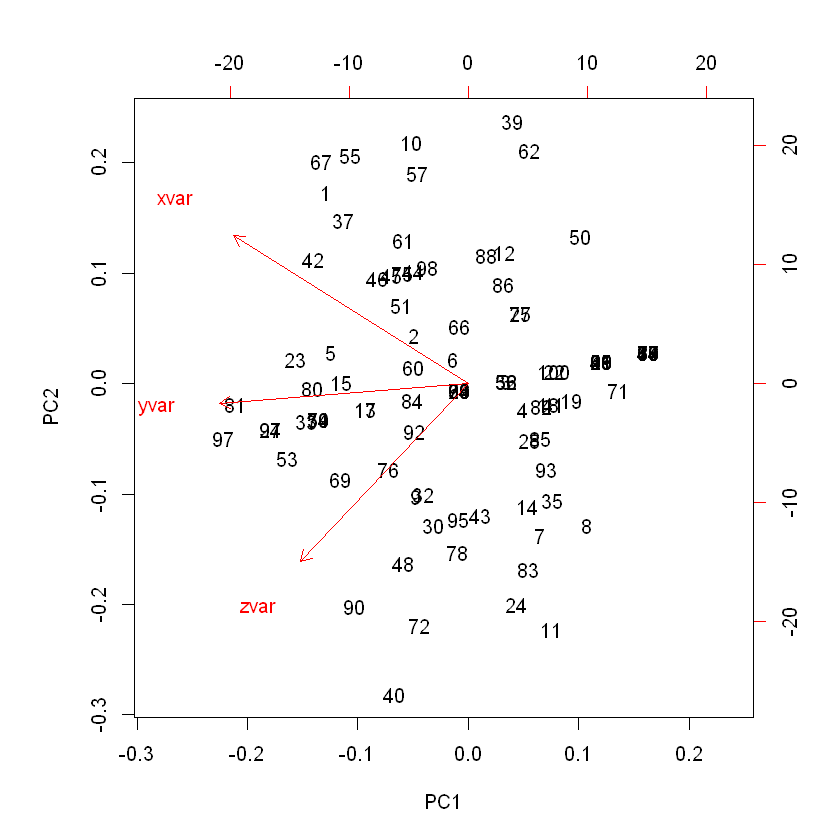

In [38]:
biplot(my.pca)

Fig. 8.4. A biplot() of a PCA solution for the simple, constructed example,
showing data points plotted on the first two components.

**8.2.3 PCA for Brand Ratings**

In [39]:
brand.pc = prcomp(brand.sc[ ,1:9])
summary(brand.pc)

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.726 1.4479 1.0389 0.8528 0.79846 0.73133 0.62458
Proportion of Variance 0.331 0.2329 0.1199 0.0808 0.07084 0.05943 0.04334
Cumulative Proportion  0.331 0.5640 0.6839 0.7647 0.83554 0.89497 0.93831
                           PC8     PC9
Standard deviation     0.55861 0.49310
Proportion of Variance 0.03467 0.02702
Cumulative Proportion  0.97298 1.00000

In [52]:
brand.pc

Standard deviations (1, .., p=9):
[1] 1.7260636 1.4479474 1.0388719 0.8527667 0.7984647 0.7313298 0.6245834
[8] 0.5586112 0.4930993

Rotation (n x k) = (9 x 9):
               PC1         PC2         PC3         PC4         PC5        PC6
perform  0.2374679  0.41991179  0.03854006 -0.52630873  0.46793435 -0.3370676
leader   0.2058257  0.52381901 -0.09512739 -0.08923461 -0.29452974 -0.2968860
latest  -0.3703806  0.20145317 -0.53273054  0.21410754  0.10586676 -0.1742059
fun     -0.2510601 -0.25037973 -0.41781346 -0.75063952 -0.33149429  0.1405367
serious  0.1597402  0.51047254 -0.04067075  0.09893394 -0.55515540  0.3924874
bargain  0.3991731 -0.21849698 -0.48989756  0.16734345 -0.01257429 -0.1393966
value    0.4474562 -0.18980822 -0.36924507  0.15118500 -0.06327757 -0.2195327
trendy  -0.3510292  0.31849032 -0.37090530  0.16764432  0.36649697  0.2658186
rebuy    0.4390184  0.01509832 -0.12461593 -0.13031231  0.35568769  0.6751400
                 PC7         PC8         PC9
perform  0.364

The default plot() for a PCA is a scree plot, which shows the successive proportion of additional variance that each component adds. We plot this as a line chart using type="l" (lower case “L” for line)

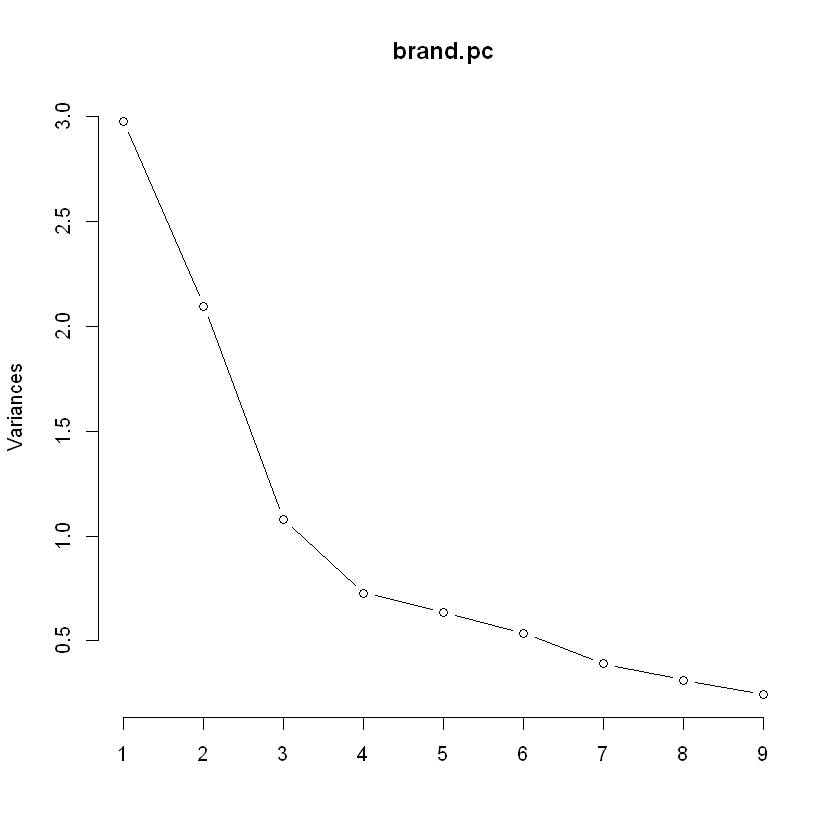

In [41]:
plot(brand.pc, type='l')

Fig. 8.5. A scree plot() of a PCA solution shows the successive variance accounted by each component. For the brand rating data, the proportion largely levels out after the third component.

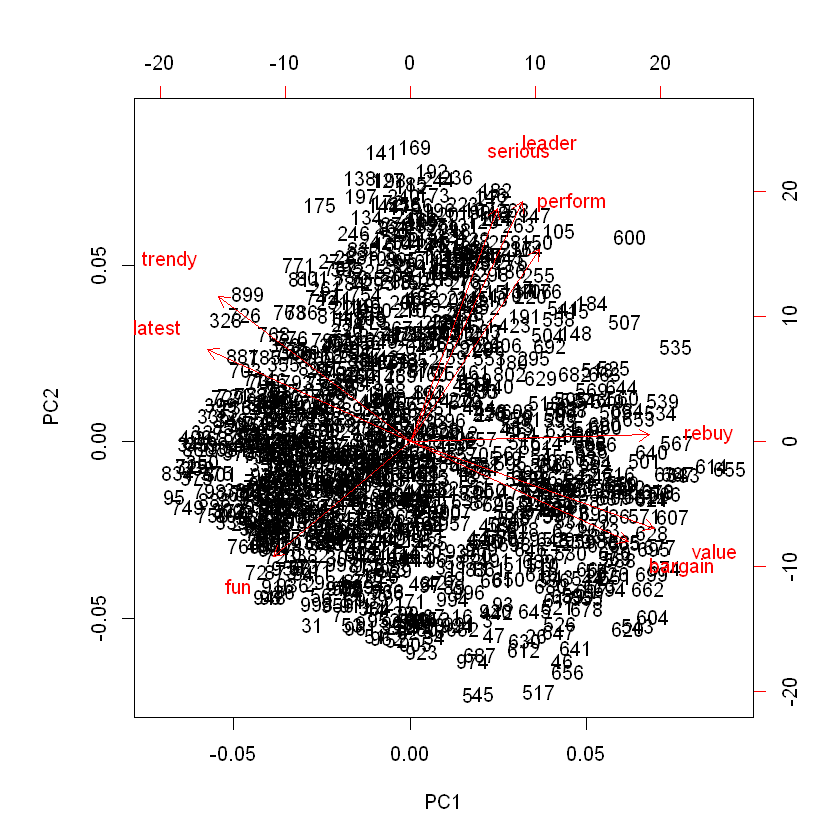

In [42]:
biplot(brand.pc)

We see the result in Fig. 8.6, where adjectives map in four regions: category
leadership (“serious,” “leader,” and “perform” in the upper right), value (“rebuy,” “value,” and “bargain”), trendiness (“trendy” and “latest”), and finally “fun” on its own.

In [43]:
brand.mean

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603
j,-0.62994504,-0.7885965,-0.1543180,0.2849595,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


In [44]:
brand.mu.pc = prcomp(brand.mean, scale=T)
summary(brand.mu.pc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1345 1.7349 0.7690 0.61498 0.50983 0.36662 0.21506
Proportion of Variance 0.5062 0.3345 0.0657 0.04202 0.02888 0.01493 0.00514
Cumulative Proportion  0.5062 0.8407 0.9064 0.94842 0.97730 0.99223 0.99737
                           PC8     PC9
Standard deviation     0.14588 0.04867
Proportion of Variance 0.00236 0.00026
Cumulative Proportion  0.99974 1.00000

In [51]:
brand.mu.pc

Standard deviations (1, .., p=9):
[1] 2.13452052 1.73494730 0.76898915 0.61498280 0.50982614 0.36661576 0.21506243
[8] 0.14588236 0.04866747

Rotation (n x k) = (9 x 9):
               PC1         PC2         PC3         PC4         PC5         PC6
perform  0.2852486 -0.33729698 -0.48121446  0.46995620  0.39623804 -0.43471514
leader   0.2473668 -0.45654557  0.31711577 -0.19084693 -0.06130157 -0.11868317
latest  -0.3562989 -0.25056983  0.49589600  0.27477470  0.46061874  0.08173299
fun     -0.3355152  0.33455495  0.15167546  0.32394053 -0.38757837 -0.63609709
serious  0.2121240 -0.47463096  0.24371327 -0.21229430 -0.39428137 -0.33437227
bargain  0.3613409  0.27776101  0.45940272  0.29120398  0.11248446 -0.12716342
value    0.4010778  0.24062869  0.33576144  0.05052374  0.20581208  0.08329187
trendy  -0.3114405 -0.37521575  0.08724910  0.48392969 -0.27261916  0.33925412
rebuy    0.4295359  0.04438337 -0.09031492  0.44234693 -0.43824713  0.36828116
                PC7          PC8        

**8.2.4 Perceptual Map of the Brands**

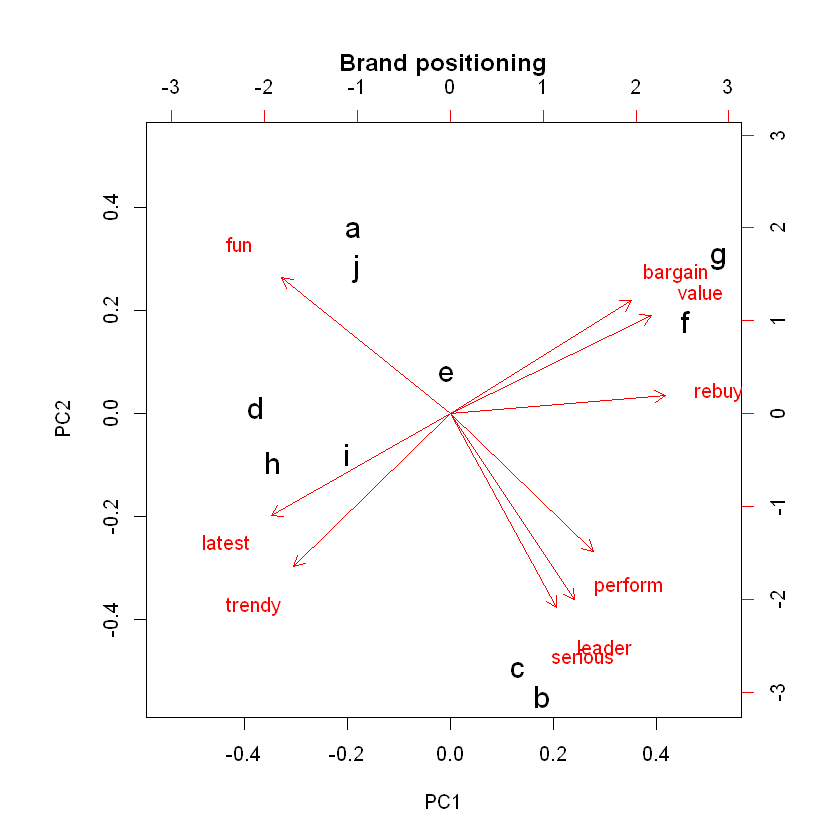

In [45]:
biplot(brand.mu.pc, main = 'Brand positioning', cex=c(1.5,1))

Fig. 8.7. A perceptual map of consumer brands with biplot() for aggregate mean rating by brand. This shows components almost identical to those in Fig. 8.6 (although spatially rotated) but the mean brand positions are clear.

In [46]:
brand.mean['c', ] - brand.mean['e', ]

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
c,1.214314,0.9699315,-0.5587936,-1.140567,1.180621,-1.158594,-0.8588416,-0.113052,-0.1689859


**Another option would be not to follow another brand but to aim for differentiated space where no brand is positioned. **
In Fig. 8.7, there is a large gap between the group b and c on the bottom of the chart, versus f and g on the upper right. This area might be described as the “value leader” area or similar.

In [50]:
colMeans(brand.mean[c('c','b','f','g'),]) - brand.mean['e',]

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
e,1.174513,0.3910396,-0.9372789,-0.9337707,0.5732131,-0.2502787,0.07921355,-0.4695304,0.6690661


This suggests that brand e could target the gap by increasing its emphasis on performance while reducing emphasis on “latest” and “fun.”

**8.3 Exploratory Factor Analysis**

EFA is a family of techniques to assess the relationship of constructs (concepts) in surveys and psychological assessments. Factors are regarded as ***latent variables*** that cannot be observed directly, but are imperfectly assessed through their relationship to other variables.

EFA attempts to find the degree to which latent, composite ***factors*** account for the observed variance of those manifest variables.

**8.3.2 Finding an EFA Solution**

In [54]:
install.packages('nFactors')
library(nFactors)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'nFactors' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.4.4"Loading required package: psych
Warning message:
"package 'psych' was built under R version 3.4.4"Loading required package: boot

Attaching package: 'boot'

The following object is masked from 'package:psych':

    logit

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.4.4"
Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma


Attaching package: 'nFactors'

The following object is masked from 'package:lattice':

    parallel



In [58]:
library(MASS)
library(psych)
library(boot)

In [59]:
nScree(brand.sc[, 1:9])

  noc naf nparallel nkaiser
1   3   2         3       3

nScree() applies several methods to estimate the number of factors from scree
tests, and in the present case three of the four methods suggest that the data set has 3 factors. We can examine the eigenvalues using eigen() on a correlation
matrix:

In [60]:
eigen(cor(brand.sc[,1:9]))

eigen() decomposition
$values
[1] 2.9792956 2.0965517 1.0792549 0.7272110 0.6375459 0.5348432 0.3901044
[8] 0.3120464 0.2431469

$vectors
            [,1]        [,2]        [,3]        [,4]        [,5]       [,6]
 [1,]  0.2374679 -0.41991179  0.03854006 -0.52630873  0.46793435 -0.3370676
 [2,]  0.2058257 -0.52381901 -0.09512739 -0.08923461 -0.29452974 -0.2968860
 [3,] -0.3703806 -0.20145317 -0.53273054  0.21410754  0.10586676 -0.1742059
 [4,] -0.2510601  0.25037973 -0.41781346 -0.75063952 -0.33149429  0.1405367
 [5,]  0.1597402 -0.51047254 -0.04067075  0.09893394 -0.55515540  0.3924874
 [6,]  0.3991731  0.21849698 -0.48989756  0.16734345 -0.01257429 -0.1393966
 [7,]  0.4474562  0.18980822 -0.36924507  0.15118500 -0.06327757 -0.2195327
 [8,] -0.3510292 -0.31849032 -0.37090530  0.16764432  0.36649697  0.2658186
 [9,]  0.4390184 -0.01509832 -0.12461593 -0.13031231  0.35568769  0.6751400
              [,7]        [,8]        [,9]
 [1,]  0.364179109 -0.14444718  0.05223384
 [2,] -0.6136743

In [61]:
factanal(brand.sc[,1:9], factors=2)


Call:
factanal(x = brand.sc[, 1:9], factors = 2)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.635   0.332   0.796   0.835   0.527   0.354   0.225   0.708   0.585 

Loadings:
        Factor1 Factor2
perform          0.600 
leader           0.818 
latest  -0.451         
fun     -0.137  -0.382 
serious          0.686 
bargain  0.803         
value    0.873   0.117 
trendy  -0.534         
rebuy    0.569   0.303 

               Factor1 Factor2
SS loadings      2.245   1.759
Proportion Var   0.249   0.195
Cumulative Var   0.249   0.445

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 556.19 on 19 degrees of freedom.
The p-value is 8.66e-106 

In [62]:
factanal(brand.sc[,1:9], factors=3)


Call:
factanal(x = brand.sc[, 1:9], factors = 3)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.607         
leader           0.810   0.106 
latest  -0.163           0.981 
fun             -0.398   0.205 
serious          0.682         
bargain  0.826          -0.122 
value    0.867          -0.198 
trendy  -0.356           0.586 
rebuy    0.499   0.296  -0.298 

               Factor1 Factor2 Factor3
SS loadings      1.853   1.752   1.510
Proportion Var   0.206   0.195   0.168
Cumulative Var   0.206   0.401   0.568

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is 3.28e-09 

The 3-factor solution retains the “value” and “leader” factors and adds a clear “latest” factor that loads strongly on “latest” and “trendy.” This adds a clearly interpretable concept to our understanding of the data. It also aligns with the bulk of suggestions from the scree and eigen tests, and fits well with the perceptual maps we saw in Sect. 8.2.4, where those adjectives were in a differentiated space. So we regard the 3-factor model as superior to the 2-factor model because the factors are more interpretable.

In [63]:
factanal(brand.sc[,1:9], factors=4)


Call:
factanal(x = brand.sc[, 1:9], factors = 4)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.610   0.032   0.276   0.783   0.598   0.264   0.233   0.333   0.467 

Loadings:
        Factor1 Factor2 Factor3 Factor4
perform  0.601                  -0.147 
leader   0.915                   0.351 
latest          -0.169   0.810   0.179 
fun     -0.384           0.216   0.141 
serious  0.628                         
bargain          0.847  -0.132         
value            0.835  -0.250         
trendy          -0.300   0.746  -0.115 
rebuy    0.327   0.504  -0.283  -0.302 

               Factor1 Factor2 Factor3 Factor4
SS loadings      1.867   1.801   1.433   0.303
Proportion Var   0.207   0.200   0.159   0.034
Cumulative Var   0.207   0.408   0.567   0.600

Test of the hypothesis that 4 factors are sufficient.
The chi square statistic is 14.07 on 6 degrees of freedom.
The p-value is 0.0289 

**8.3.3 EFA Rotations**

we could allow correlated factors in our solution. This is known as an oblique rotation (“oblique” because the dimensional axes are not perpendicular but are skewed by the correlation between factors).

In [67]:
install.packages('GPArotation')
library(GPArotation)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'GPArotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


In [70]:
(brand.fa.ob = factanal(brand.sc[,1:9], factors=3, rotation='oblimin'))


Call:
factanal(x = brand.sc[, 1:9], factors = 3, rotation = "oblimin")

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.601         
leader           0.816         
latest                   1.009 
fun             -0.381   0.229 
serious          0.689         
bargain  0.859                 
value    0.880                 
trendy  -0.267   0.128   0.538 
rebuy    0.448   0.255  -0.226 

               Factor1 Factor2 Factor3
SS loadings      1.789   1.733   1.430
Proportion Var   0.199   0.193   0.159
Cumulative Var   0.199   0.391   0.550

Factor Correlations:
        Factor1 Factor2 Factor3
Factor1  1.0000  -0.388  0.0368
Factor2 -0.3884   1.000 -0.1091
Factor3  0.0368  -0.109  1.0000

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is

The negative correlation between factors 1 and 2 is consistent with our theory that brands that are leaders are less likely to be value brands, and thus we think this is a more interpretable result.

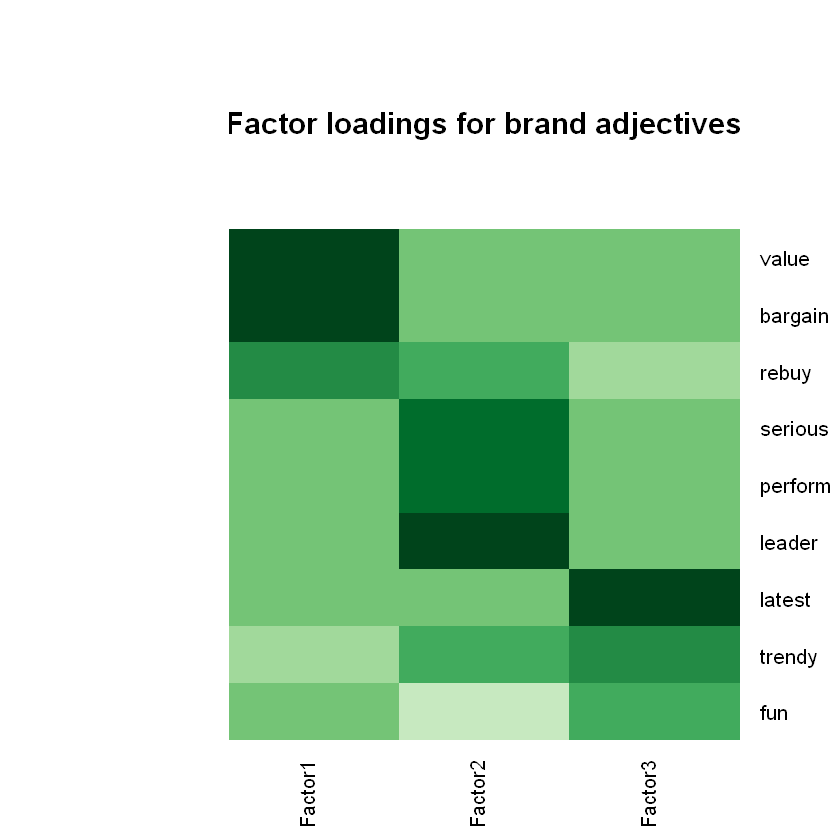

In [74]:
heatmap.2(brand.fa.ob$loadings, col=brewer.pal(9, "Greens"), trace='none',
          key=F, dend='none', Colv=F, cexCol=1.2, main='\n\n\n\nFactor loadings for brand adjectives')

The result is Fig. 8.8, which shows a distinct separation of items into 3 factors,
which are roughly interpretable as value, leader, and latest. Note that the item
rebuy, which reflects stated intention to repurchase, loads on both Factor1 (value)
and Factor2 (leader). This suggests that in our simulated data, consumers say they
would **rebuy a brand for either reason, because it is a good value or because it is a
leader.**

In [76]:
install.packages('semPlot')
library(semPlot)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'checkmate', 'abind', 'SparseM', 'MatrixModels', 'Formula', 'latticeExtra', 'acepack', 'gridExtra', 'htmlTable', 'viridis', 'statnet.common', 'network', 'rjson', 'arm', 'minqa', 'nloptr', 'pbkrtest', 'quantreg', 'mvtnorm', 'ellipse', 'Hmisc', 'jpeg', 'png', 'sna', 'glasso', 'huge', 'fdrtool', 'd3Network', 'ggm', 'pbivnorm', 'quadprog', 'matrixcalc', 'mi', 'irlba', 'lme4', 'car', 'RcppEigen', 'StanHeaders', 'rpf', 'qgraph', 'lavaan', 'sem', 'XML', 'igraph', 'lisrelToR', 'rockchalk', 'corpcor', 'semTools', 'OpenMx'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'statnet.common' successfully unpacked and MD5 sums checked
package 'network' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'arm' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'pbk

Another useful graphic for factor analysis models is a ***path diagram***, which shows
latent variables and the individual items that load on them.

Warning message in qgraph(Edgelist, labels = nLab, bidirectional = Bidir, directed = Directed, :
"The following arguments are not documented and likely not arguments of qgraph and thus ignored: loopRotation; residuals; residScale; residEdge; CircleEdgeEnd"

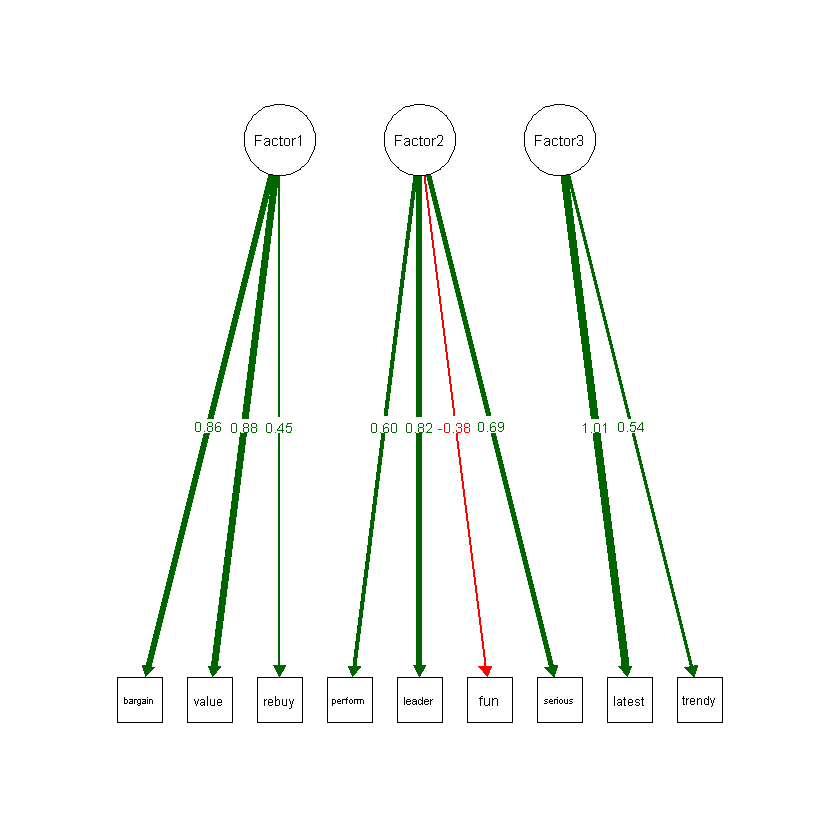

In [77]:
semPaths(brand.fa.ob, what='est', residuals = F, cut=0.3, 
         posCol=c('white', 'darkgreen'), negCol=c('white', 'red'), 
         edge.label.cex = 0.75, nCharNodes=7)

Fig. 8.9. A path diagram for the factor
analysis solution, which clearly displays
the three factors and their item loadings
(*|loadings| < 0.3* are excluded). The
graphic is generated with *semPaths()*
from the *semPlot* package.

**8.3.4 Using Factor Scores for Brands**

Factor scores are requested from factanal() by adding the scores=... argument.
We request *Bartlett* scores (see ?factanal), and extract them from
the factanal() object using $scores, storing them as a separate data
frame

In [88]:
brand.fa.ob  = factanal(brand.sc[,1:9], factors=3, rotation='oblimin', scores=
                       'Bartlett')
brand.scores = data.frame(brand.fa.ob$scores)  # get the factor scores
brand.scores$brand = brand.sc$brand  # get the matching brands

In [89]:
brand.scores

Factor1,Factor2,Factor3,brand
1.65213641,-0.68867492,0.52561040,a
-1.40053333,-1.66819014,-0.67641211,a
1.14573108,-1.06180076,-0.42858527,a
0.20097246,-0.32454616,1.21134236,a
2.00020091,-1.90715192,-0.45599050,a
1.41750630,0.33394624,0.85555246,a
-0.76761579,-1.82349493,-0.37465795,a
1.16160650,-1.41780120,0.22180101,a
1.09207350,-1.79645733,0.54126389,a
-0.55786818,-1.59296505,0.90774270,a


The result is an estimated score for each respondent on each factor and brand. If we
wish to investigate individual-level correlates of the factors, such as their relationship
to demographics or purchase behavior, we could use these estimates of factor
scores.
This can be very helpful in analyses such as regression and segmentation
because it reduces the model complexity (number of dimensions) and uses more
reliable estimates (factor scores that reflect several manifest variables). Instead of
nine items, we have three factors.

In [93]:
(brand.fa.mean = aggregate(.~brand,data=brand.scores, mean))

brand,Factor1,Factor2,Factor3
a,0.23158792,-1.06993703,0.39326652
b,0.09686823,1.51913070,0.72391174
c,-0.58937138,1.45069457,-0.07690784
d,-1.04380419,-0.78186861,0.37914638
e,0.52169760,-0.05373430,0.43709349
f,1.15218492,0.45442899,-1.28395765
g,1.36873947,0.04408369,-1.31900029
h,-0.91592078,-0.31418560,0.52676516
i,-0.66918513,-0.20741901,0.37331202
j,-0.15279666,-1.04119340,-0.15362952


We clean this up by assigning names for the rows (brands) and columns
(factors)

In [94]:
rownames(brand.fa.mean) = brand.fa.mean[,1]
brand.fa.mean = brand.fa.mean[,-1]
names(brand.fa.mean) = c('Leader', 'Value', 'Latest')
brand.fa.mean

,Leader,Value,Latest
a,0.23158792,-1.06993703,0.39326652
b,0.09686823,1.51913070,0.72391174
c,-0.58937138,1.45069457,-0.07690784
d,-1.04380419,-0.78186861,0.37914638
e,0.52169760,-0.05373430,0.43709349
f,1.15218492,0.45442899,-1.28395765
g,1.36873947,0.04408369,-1.31900029
h,-0.91592078,-0.31418560,0.52676516
i,-0.66918513,-0.20741901,0.37331202
j,-0.15279666,-1.04119340,-0.15362952


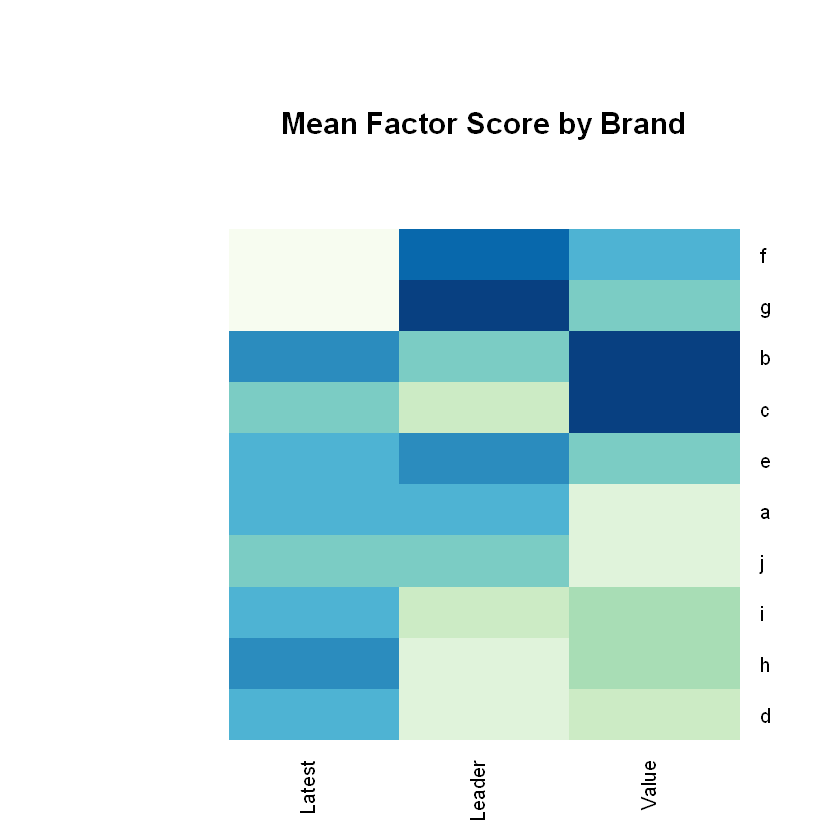

In [102]:
heatmap.2(as.matrix(brand.fa.mean), col=brewer.pal(9, 'GnBu'), trace='none', key=F, dend='none', cexCol=1.2, main='\n\n\n\nMean Factor Score by Brand')

The result is Fig. 8.10. When we compare this to the chart of brand by adjective in
Fig. 8.2, we see that the chart of factor scores is significantly simpler than the full
adjective matrix. The brand similarities are evident again in the factor scores, for
instance that f and g are similar, as are b and c, and so forth.

**8.4 Multidimensional Scaling**

MDS is a family of procedures that can also be used to find lower-dimensional representations
of data. Instead of extracting underlying components or latent factors,
MDS works instead with *distances* (also known as *similarities*). MDS attempts to
find a lower-dimensional map that best preserves all the observed similarities between
items.

In [104]:
(brand.dist = dist(brand.mean))

          a         b         c         d         e         f         g
b 3.9184227                                                            
c 3.7289473 1.4866650                                                  
d 2.0909865 3.5947430 3.2774975                                        
e 1.6394896 2.5928310 2.7465651 2.3891987                              
f 3.4920690 3.4082579 3.2705177 4.2747519 2.6263214                    
g 3.7141328 4.0018551 3.9367805 4.6237330 3.3060813 1.6631926          
h 2.2805206 3.1019641 2.8799703 1.0978504 2.1900663 4.1663070 4.5852296
i 2.1873130 2.7084652 2.5596818 1.4015933 1.8805100 3.6161470 3.9455440
j 0.9953277 3.7994121 3.3755278 1.8355932 1.9491873 3.4608064 3.6730175
          h         i
b                    
c                    
d                    
e                    
f                    
g                    
h                    
i 0.8399656          
j 2.0734019 1.9781911

In [105]:
(brand.mds = cmdscale(brand.dist))

a,-7.570113e-01,1.4619032
b,5.586301e-01,-2.1698618
c,3.894979e-01,-1.9060516
d,-1.792314e+00,0.2561488
e,4.680797e-05,0.2292118
f,2.361783e+00,0.4295718
g,2.667463e+00,1.0304417
h,-1.646706e+00,-0.2709150
i,-9.923031e-01,-0.2576957
j,-7.890864e-01,1.1972468
